<a href="https://colab.research.google.com/github/shrujaya/lavu-internship/blob/main/Lavu_Internship_(Jun_Jul_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phase 1 - Opening Up the Dataset**



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/logs-insights-results_10k_records.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   @timestamp  10000 non-null  object
 1   @message    10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df.head()

,@timestamp,@message
0,2022-06-13 10:30:46.911,"{""timestamp"":1655116246911,""formatVersion"":1,""..."
1,2022-06-13 10:30:46.309,"{""timestamp"":1655116246309,""formatVersion"":1,""..."
2,2022-06-13 10:30:45.831,"{""timestamp"":1655116245831,""formatVersion"":1,""..."
3,2022-06-13 10:30:45.633,"{""timestamp"":1655116245633,""formatVersion"":1,""..."
4,2022-06-13 10:30:45.564,"{""timestamp"":1655116245564,""formatVersion"":1,""..."


In [ ]:
for column in df.columns :
  print(column, type(df[column][0]))

@timestamp <class 'str'>
@message <class 'str'>


In [ ]:
import json

In [ ]:
msgs = df['@message'].apply(json.loads) #applying json.loads() to each json string in the series, returns a series of dicts
msgs = pd.DataFrame(msgs.tolist()) #converts a series of dicts into a dataframe

In [ ]:
msgs.head()

,timestamp,formatVersion,webaclId,terminatingRuleId,terminatingRuleType,action,terminatingRuleMatchDetails,httpSourceName,httpSourceId,ruleGroupList,rateBasedRuleList,nonTerminatingMatchingRules,requestHeadersInserted,responseCodeSent,httpRequest,labels
0,1655116246911,1,arn:aws:wafv2:us-east-1:962002622227:regional/...,WAF-ACL-Domain-Kiosk-Mobile,REGULAR,ALLOW,[],ALB,962002622227-app/FortiWeb-ALB3/390b2ceea0584755,[],[],[],None,None,"{'clientIp': '66.25.248.39', 'country': 'US', ...",NaN
1,1655116246309,1,arn:aws:wafv2:us-east-1:962002622227:regional/...,WAF-ACL-Domain-Kiosk-Mobile,REGULAR,ALLOW,[],ALB,962002622227-app/FortiWeb-ALB3/390b2ceea0584755,[],[],[],None,None,"{'clientIp': '97.121.173.253', 'country': 'US'...",NaN
2,1655116245831,1,arn:aws:wafv2:us-east-1:962002622227:regional/...,WAF-ACL-Domain-Kiosk-Mobile,REGULAR,ALLOW,[],ALB,962002622227-app/FortiWeb-ALB3/390b2ceea0584755,[],[],[],None,None,"{'clientIp': '24.101.215.181', 'country': 'US'...",NaN
3,1655116245633,1,arn:aws:wafv2:us-east-1:962002622227:regional/...,WAF-ACL-Domain-Kiosk-Mobile,REGULAR,ALLOW,[],ALB,962002622227-app/FortiWeb-ALB3/390b2ceea0584755,[],[],[],None,None,"{'clientIp': '66.220.98.206', 'country': 'US',...",NaN
4,1655116245564,1,arn:aws:wafv2:us-east-1:962002622227:regional/...,WAF-ACL-Domain-Kiosk-Mobile,REGULAR,ALLOW,[],ALB,962002622227-app/FortiWeb-ALB3/390b2ceea0584755,[],[],[],None,None,"{'clientIp': '174.80.220.8', 'country': 'US', ...",NaN


In [ ]:
for column in msgs.columns :
  print(column, type(msgs[column][0]))

timestamp <class 'numpy.int64'>
formatVersion <class 'numpy.int64'>
webaclId <class 'str'>
terminatingRuleId <class 'str'>
terminatingRuleType <class 'str'>
action <class 'str'>
terminatingRuleMatchDetails <class 'list'>
httpSourceName <class 'str'>
httpSourceId <class 'str'>
ruleGroupList <class 'list'>
rateBasedRuleList <class 'list'>
nonTerminatingMatchingRules <class 'list'>
requestHeadersInserted <class 'NoneType'>
responseCodeSent <class 'NoneType'>
httpRequest <class 'dict'>
labels <class 'float'>


In [ ]:
httpRequest = pd.DataFrame(msgs['httpRequest'].tolist())
httpRequest.head()

,clientIp,country,headers,uri,args,httpVersion,httpMethod,requestId
0,66.25.248.39,US,"[{'name': 'Host', 'value': 'ac1.lavusys.com'},...",/hello.php,ZIG=2195&YIG=4967,HTTP/1.1,POST,1-62a711d6-18252c85571b6d726d4cadb9
1,97.121.173.253,US,"[{'name': 'Host', 'value': 'ac1.lavusys.com'},...",/lib/json_connect.php,YIG=6204&PHPSESSID=v7kqnjvf3bgjvdkn029vdkqbm7,HTTP/1.1,POST,1-62a711d6-4dcb72b51b5a4b9230af229e
2,24.101.215.181,US,"[{'name': 'Host', 'value': 'ac1.lavusys.com'},...",/lib/json_connect.php,YIG=4355&PHPSESSID=0lr71qc7pitfoid30q4mo6puv3,HTTP/1.1,POST,1-62a711d5-777e7c3e0ffc6f816c9798db
3,66.220.98.206,US,"[{'name': 'Host', 'value': 'autocloud.poslavu....",/lib/json_connect.php,YIG=2913&PHPSESSID=gjfrcok4bfltp8m9eaindfv2h1,HTTP/1.1,POST,1-62a711d5-5a85acd04e7d27cc5217d5bb
4,174.80.220.8,US,"[{'name': 'Host', 'value': 'ac1.lavusys.com'},...",/lib/json_connect.php,YIG=8206&PHPSESSID=0j09n400b0464rujvddu3lh9r7,HTTP/1.1,POST,1-62a711d5-1e9673f72ffe2f0f6e101510


In [ ]:
for column in httpRequest.columns :
  print(column, type(httpRequest[column][0]))

clientIp <class 'str'>
country <class 'str'>
headers <class 'list'>
uri <class 'str'>
args <class 'str'>
httpVersion <class 'str'>
httpMethod <class 'str'>
requestId <class 'str'>


In [ ]:
httpRequest['headers'][0] #list of dicts, one key-value pair per dict

[{'name': 'Host', 'value': 'ac1.lavusys.com'},
 {'name': 'Content-Type', 'value': 'application/x-www-form-urlencoded'},
 {'name': 'Cookie',
  'value': 'PHPSESSID=reh9am64mhui87ohemu2hacft7; cookiesession1=678A3E0EMNOPQRSTU6789801234A6BD5'},
 {'name': 'User-Agent',
  'value': 'Lavu%20POS/20220513 CFNetwork/1333.0.4 Darwin/21.5.0'},
 {'name': 'Connection', 'value': 'keep-alive'},
 {'name': 'Accept', 'value': '*/*'},
 {'name': 'Accept-Language', 'value': 'en-US,en;q=0.9'},
 {'name': 'Content-Length', 'value': '113'},
 {'name': 'Cache-Control', 'value': 'no-cache'},
 {'name': 'Accept-Encoding', 'value': 'gzip, deflate, br'}]

In [ ]:
#converting into 1 big dict containing all key-value pairs
count = 0
for eachList in httpRequest['headers'] :
  newDict = {}
  for eachDict in eachList :
    newDict[eachDict['name']] = eachDict['value']
  httpRequest.loc[count]['headers'] = newDict
  count += 1

In [ ]:
headers = pd.DataFrame(httpRequest['headers'].tolist())
headers.head()

,Host,Content-Type,Cookie,User-Agent,Connection,Accept,Accept-Language,Content-Length,Cache-Control,Accept-Encoding,...,sec-fetch-dest,accept-language,X-Requested-With,Content-type,sensorid,if-none-match,if-modified-since,Upgrade-Insecure-Requests,Sec-WebSocket-Key,Sec-WebSocket-Version
0,ac1.lavusys.com,application/x-www-form-urlencoded,PHPSESSID=reh9am64mhui87ohemu2hacft7; cookiese...,Lavu%20POS/20220513 CFNetwork/1333.0.4 Darwin/...,keep-alive,*/*,"en-US,en;q=0.9",113,no-cache,"gzip, deflate, br",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ac1.lavusys.com,application/x-www-form-urlencoded,PHPSESSID=v7kqnjvf3bgjvdkn029vdkqbm7; cookiese...,Lavu%20POS/20220513 CFNetwork/1331.0.7 Darwin/...,keep-alive,*/*,"en-US,en;q=0.9",295,no-cache,"gzip, deflate, br",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ac1.lavusys.com,application/x-www-form-urlencoded,PHPSESSID=0lr71qc7pitfoid30q4mo6puv3; cookiese...,Lavu%20POS/20220513 CFNetwork/1333.0.4 Darwin/...,keep-alive,*/*,"en-US,en;q=0.9",399,no-cache,"gzip, deflate, br",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,autocloud.poslavu.com,application/x-www-form-urlencoded,PHPSESSID=gjfrcok4bfltp8m9eaindfv2h1; cookiese...,Lavu%20POS/20220513 CFNetwork/1333.0.4 Darwin/...,keep-alive,*/*,"en-US,en;q=0.9",410,no-cache,"gzip, deflate",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ac1.lavusys.com,application/x-www-form-urlencoded,PHPSESSID=0j09n400b0464rujvddu3lh9r7; cookiese...,Lavu%20POS/20220513 CFNetwork/1331.0.7 Darwin/...,keep-alive,*/*,"en-US,en;q=0.9",351,no-cache,"gzip, deflate, br",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logs = pd.concat([msgs,httpRequest,headers], axis=1) #concatenating the three dataframes

In [ ]:
msgs.shape, httpRequest.shape, headers.shape, logs.shape #column numbers add up

((10000, 16), (10000, 8), (10000, 57), (10000, 81))

In [ ]:
logs.drop(['headers', 'httpRequest'], axis = 1, inplace=True)

In [ ]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   timestamp                    10000 non-null  int64 
 1   formatVersion                10000 non-null  int64 
 2   webaclId                     10000 non-null  object
 3   terminatingRuleId            10000 non-null  object
 4   terminatingRuleType          10000 non-null  object
 5   action                       10000 non-null  object
 6   terminatingRuleMatchDetails  10000 non-null  object
 7   httpSourceName               10000 non-null  object
 8   httpSourceId                 10000 non-null  object
 9   ruleGroupList                10000 non-null  object
 10  rateBasedRuleList            10000 non-null  object
 11  nonTerminatingMatchingRules  10000 non-null  object
 12  requestHeadersInserted       0 non-null      object
 13  responseCodeSent             0 n

In [ ]:
logs.drop(['requestHeadersInserted', 'responseCodeSent'], axis = 1, inplace=True) #dropping the 2 all-null columns

In [ ]:
#creating an array of tuples (correct colName, duplicate colName)
duplicates = []
for i in range(len(logs.columns)) :
  for j in range(i+1, len(logs.columns)) :
    if logs.columns[i].casefold() == logs.columns[j].casefold() : #checking case-insensitive equality
      duplicates.append((logs.columns[i], logs.columns[j]))
duplicates

[('Host', 'host'),
 ('Content-Type', 'content-type'),
 ('Content-Type', 'Content-type'),
 ('Cookie', 'cookie'),
 ('User-Agent', 'user-agent'),
 ('Accept', 'accept'),
 ('Accept-Language', 'accept-language'),
 ('Content-Length', 'content-length'),
 ('Cache-Control', 'cache-control'),
 ('Accept-Encoding', 'accept-encoding'),
 ('Sec-Websocket-Version', 'Sec-WebSocket-Version'),
 ('Origin', 'origin'),
 ('Sec-Websocket-Key', 'Sec-WebSocket-Key'),
 ('Sec-Fetch-Dest', 'sec-fetch-dest'),
 ('Sec-Fetch-Mode', 'sec-fetch-mode'),
 ('Sec-Fetch-Site', 'sec-fetch-site'),
 ('content-type', 'Content-type'),
 ('referer', 'Referer'),
 ('x-requested-with', 'X-Requested-With')]

In [ ]:
for orig, shadow in duplicates : #orig = correct colName, shadow = duplicate colName
  logs[orig] = np.where(logs[orig].isna(), logs[shadow], logs[orig]) #if origValue == null then replace with shadowValue, else maintain origValue

In [ ]:
logs.drop([shadow for orig, shadow in duplicates], axis = 1, inplace=True) #dropping the shadow columns

In [ ]:
for col in logs.columns :
  if logs[col].isna().sum() > 50/100 * len(logs[col]) :
    logs.drop([col], axis=1, inplace=True)

In [ ]:
for column in logs.columns :
  print(column, type(logs[column][0]))

timestamp <class 'numpy.int64'>
formatVersion <class 'numpy.int64'>
webaclId <class 'str'>
terminatingRuleId <class 'str'>
terminatingRuleType <class 'str'>
action <class 'str'>
terminatingRuleMatchDetails <class 'list'>
httpSourceName <class 'str'>
httpSourceId <class 'str'>
ruleGroupList <class 'list'>
rateBasedRuleList <class 'list'>
nonTerminatingMatchingRules <class 'list'>
clientIp <class 'str'>
country <class 'str'>
uri <class 'str'>
args <class 'str'>
httpVersion <class 'str'>
httpMethod <class 'str'>
requestId <class 'str'>
Host <class 'str'>
Content-Type <class 'str'>
Cookie <class 'str'>
User-Agent <class 'str'>
Connection <class 'str'>
Accept <class 'str'>
Accept-Language <class 'str'>
Content-Length <class 'str'>
Cache-Control <class 'str'>
Accept-Encoding <class 'str'>


In [ ]:
listCols = [col for col in logs.columns if type(logs[col][0]) == list]
listCols

['terminatingRuleMatchDetails',
 'ruleGroupList',
 'rateBasedRuleList',
 'nonTerminatingMatchingRules']

In [ ]:
#dropping 'terminatingRuleMatchDetails' and 'nonTerminatingMatchingRules'
for listCol in listCols :
  count = 0
  for entry in logs[listCol].values :
    if len(entry) == 0 :
      count += 1
  print(count, len(logs[listCol]))
  if (count == len(logs[listCol])) :
    logs.drop([listCol], axis=1, inplace=True)

10000 10000
9882 10000
9882 10000
10000 10000


In [ ]:
10000 - 9882
# this is less than 50% of the length anyway, so we'll drop these too
logs.drop(['ruleGroupList', 'rateBasedRuleList'], axis=1, inplace=True)

In [ ]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            10000 non-null  int64 
 1   formatVersion        10000 non-null  int64 
 2   webaclId             10000 non-null  object
 3   terminatingRuleId    10000 non-null  object
 4   terminatingRuleType  10000 non-null  object
 5   action               10000 non-null  object
 6   httpSourceName       10000 non-null  object
 7   httpSourceId         10000 non-null  object
 8   clientIp             10000 non-null  object
 9   country              10000 non-null  object
 10  uri                  10000 non-null  object
 11  args                 10000 non-null  object
 12  httpVersion          10000 non-null  object
 13  httpMethod           10000 non-null  object
 14  requestId            10000 non-null  object
 15  Host                 10000 non-null  object
 16  Conte

In [ ]:
logs = logs.apply(lambda x: x.fillna(x.value_counts().index[0]))

## **Phase 2 - Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
for col in logs.columns :
  encoded = pd.DataFrame(ohe.fit_transform(logs[[col]]).toarray())
  encoded.columns = logs[col].unique()
  logs = logs.join(encoded)
  logs.drop([col], axis=1, inplace=True)

In [ ]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 34225 entries, 1655116246911 to identity
dtypes: float64(34225)
memory usage: 2.5 GB


## **Phase 3 - Feature Selection**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
logs = StandardScaler().fit_transform(logs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
wcss = []
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(logs)

([<matplotlib.axis.XTick at 0x7fa04b43cd10>,
 <a list of 2 Text major ticklabel objects>)

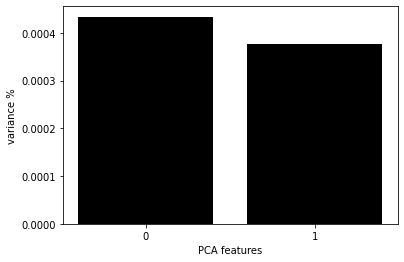

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
pcaComponents = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

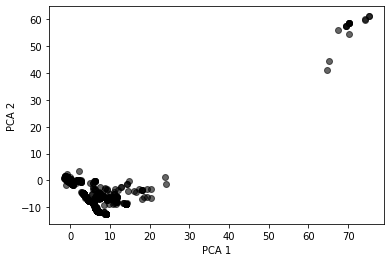

In [ ]:
plt.scatter(pcaComponents[0], pcaComponents[1], alpha=.6, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
for i in range(1, 5) :
  kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 ).fit(principalComponents)
  wcss.append(kmeans.inertia_)

In [ ]:
kmeans.cluster_centers_

array([[-0.85896233,  0.71189831],
       [ 6.39578395, -9.88822616],
       [70.37116111, 56.48963226],
       [11.29289568, -6.32002302]])

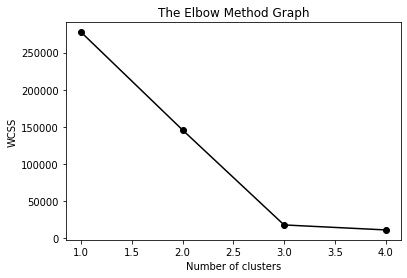

In [ ]:
plt.plot(range(1,5), wcss, '-o', color='black')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0)

In [ ]:
label = kmeans.fit_predict(principalComponents)

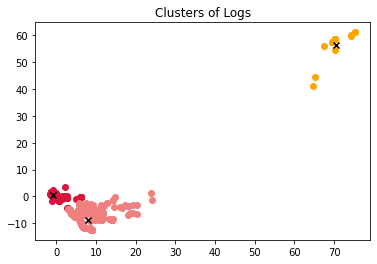

In [ ]:
plt.scatter(principalComponents[label==0, 0], principalComponents[label==0, 1], c='crimson', label ='Cluster 0')
plt.scatter(principalComponents[label==1, 0], principalComponents[label==1, 1], c='orange', label ='Cluster 1')
plt.scatter(principalComponents[label==2, 0], principalComponents[label==2, 1], c='lightcoral', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:3, 0], kmeans.cluster_centers_[:3, 1], c='black', marker='x', label = 'Centroids')
plt.title('Clusters of Logs')
plt.show()

In [ ]:
clusterMap = pd.DataFrame()
clusterMap['log'] = df['@message']
clusterMap['cluster'] = kmeans.labels_

In [ ]:
clusterMap[clusterMap.cluster == 1]

,log,cluster
26,"{""timestamp"":1655116234810,""formatVersion"":1,""...",1
5053,"{""timestamp"":1655116153670,""formatVersion"":1,""...",1
5054,"{""timestamp"":1655116153669,""formatVersion"":1,""...",1
5148,"{""timestamp"":1655116153131,""formatVersion"":1,""...",1
5163,"{""timestamp"":1655116153045,""formatVersion"":1,""...",1
5166,"{""timestamp"":1655116153025,""formatVersion"":1,""...",1
5167,"{""timestamp"":1655116153024,""formatVersion"":1,""...",1
5168,"{""timestamp"":1655116153023,""formatVersion"":1,""...",1
5169,"{""timestamp"":1655116153021,""formatVersion"":1,""...",1
5170,"{""timestamp"":1655116152997,""formatVersion"":1,""...",1
